# Tema: Mínimos cuadrados

---

## Conjunto de ejercicios


1. Dados los datos:

| $x_i$ | 4.0  | 4.2   | 4.5   | 4.7   | 5.1   | 5.5   | 5.9   | 6.3   | 6.8   | 7.1   |
|-----------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| $y_i$ | 102.56 | 130.11 | 113.18 | 142.05 | 167.53 | 195.14 | 224.87 | 256.73 | 299.50 | 326.72 |


- a. Construya el polinomio por mínimo cuadrados de grado 1 y calcule el error.  
- b. Construya el polinomio por mínimo cuadrados de grado 2 y calcule el error.  
- c. Construya el polinomio por mínimo cuadrados de grado 3 y calcule el error.  
- d. Construya el polinomio por mínimo cuadrados de la forma $be^{ax}$ y calcule el error.  
- e. Construya el polinomio por mínimo cuadrados de la forma $bx^{a}$ y calcule el error.

Primero realizamos la funcion para minimos cuadrados y para hallar los coeficientes:

In [2]:
import numpy as np
        
def minimosCuadrados(n, grado, xi, yi):
    A = np.zeros((grado+1,grado+1))
    b = np.zeros((grado+1,1))
    for i in range (0,grado+1):
        for j in range(0,grado+1):
            k=0
            while (k<n):
                A[i,j] += xi[k]**((i)+(j))
                k += 1
        for l in range(n):
            b[i] += (xi[l]**(i))*yi[l]
            
    print_matrix(A, "Matriz A")
    print_matrix(b, "Vector b")
    return A,b

def hallarCoef(a,b):
    A=np.linalg.inv(a)
    x = np.dot(A,b)
    print_matrix(x, "Coeficientes del polinomio")
    return x


Con las siguientes funciones podremos dibujar los puntos requerridos

In [3]:
import matplotlib.pyplot as plt
import sympy as sym

def graficar(xi,yi,c,colorcurva,rango_x,rango_y,x_pol,y_pol,lim_inf):
    x = sym.Symbol('x')
    f_x = sum(round(coef[0],4) *x**i for i, coef in enumerate(c))
    # Generar valores de x
    x_val = np.linspace(min(xi)-lim_inf, max(xi)+lim_inf, 100)
    f = sym.lambdify(x, f_x, modules=['numpy'])
    # Calcular los  valores de y 
    y = f(x_val)
    
    xi = np.array(xi)
    yi = np.array(yi)
    # Calcular los residuos (errores)
    residuos = yi - f(xi)
    imprimirErrores(residuos,xi)
    # Calcular el error cuadrático medio (MSE)
    mse = np.mean(residuos**2)
    print("El error cuadrático medio para este ajuste es de:", round(mse,6))
    imprimirPolinomio(f_x)
    # Graficar
    plt.figure(figsize=(10, 8))
    # Graficar los puntos originales con barras de error
    plt.errorbar(xi, yi, yerr=abs(residuos), fmt=' ', color='red', label='Datos originales con error')
    # Graficar la ecuación
    plt.plot(x_val, y,color = colorcurva, label = 'Polinomio aproximado')
    #Graficar los datos originales
    plt.scatter(xi, yi, color='black', label='Datos originales', s = 20)
    #Graficar los nombres de los ejes
    plt.xlabel('x')
    plt.ylabel('y')
    #Limites para x e y
    ax = plt.gca()
    ax.set_ylim(rango_y)
    ax.set_xlim(rango_x)
    #Agregar cuadrícula
    plt.grid(True)
    #Agregar la leyenda
    plt.legend()
    #Agregar la ecuación de la curva a la gráfica
    plt.text(x_pol, y_pol, f'$P(x) = {sym.latex(f_x)}$', fontsize=12, color=colorcurva, verticalalignment='bottom')
    # Marca los ejes coordenados
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.show()

def graficarNoLineales(xi,yi,f_x,colorcurva,rango_x,rango_y,x_pol,y_pol,lim_inf):   
    x = sym.Symbol('x')
    # Generar valores de x
    x_val = np.linspace(min(xi)-lim_inf, max(xi)+1, 100)
    f = sym.lambdify(x, f_x, modules=['numpy'])
    # Calcular los  valores de y 
    y = f(x_val)
    
    xi = np.array(xi)
    yi = np.array(yi)
    # Calcular los residuos (errores)
    residuos = yi - f(xi)
    imprimirErrores(residuos,xi)
    # Calcular el error cuadrático medio (MSE)
    mse = np.mean(residuos**2)
    print("El error cuadrático medio para este ajuste es de:", round(mse,2))
    imprimirPolinomio(f_x)
    # Graficar
    plt.figure(figsize=(10, 8))
    # Graficar los puntos originales con barras de error
    plt.errorbar(xi, yi, yerr=abs(residuos), fmt=' ', color='red', label='Datos originales con error')
    # Graficar la ecuación
    plt.plot(x_val, y,color = colorcurva, label = 'Polinomio aproximado')
    #Graficar los datos originales
    plt.scatter(xi, yi, color='black', label='Datos originales', s = 20)
    #Graficar los nombres de los ejes
    plt.xlabel('x')
    plt.ylabel('y')
    #Limites para x e y
    ax = plt.gca()
    ax.set_ylim(rango_y)
    ax.set_xlim(rango_x)
    #Agregar cuadrícula
    plt.grid(True)
    #Agregar la leyenda
    plt.legend()
    #Agregar la ecuación de la curva a la gráfica
    plt.text(x_pol, y_pol, f'$P(x) = {sym.latex(f_x)}$', fontsize=12, color=colorcurva, verticalalignment='bottom')
    # Marca los ejes coordenados
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.show()


In [4]:
from IPython.display import display, Math

def expOriginal(c,exp):
    print("Con los coeficientes asociados al polinomio linealizado hallamos los coeficientes de nuestra\n expresión:\n")  
    #Hallar los coeficientes adecuados
    b_exp = np.e**(c[0,0])
    a_exp = c[1,0]
    print("a =",a_exp," y b =", b_exp,"\n")
        
    x = sym.Symbol('x')
    if exp:
        #Generar la ecuación en la forma be^{ax}
        f_x = round(b_exp,4)*sym.exp(round(a_exp,4)*x)
    else:
        #Generar la ecuación en la forma bx^{a}
        f_x = round(b_exp,4)*x**(round(a_exp,4))
    return f_x


Impresion:

In [12]:
def print_matrix(matrix, name):
    print(name + ":")
    for row in matrix:
        print(" [ ", "   ".join(f"{elem:12.4f}" for elem in row), "]")
        
def imprimirErrores(residuos,xi):
    i=1
    print(" ")
    for res in residuos:
        print("El error absoluto de f(x_"+str(i)+") al punto x_"+str(i)+" es de",round(abs(res),6))
        i += 1
   
def imprimirPolinomio(f_x):    
    latex_expr = sym.latex(f_x)
    print("\n")
    print("El polinomio es:\n")
    display(Math(latex_expr))

Ahora, vamos a considerar que el polinomio de grado m que se desea ajustar a n puntos tiene la forma: $P(x) = c_{0}+c_{1}x+c_{2}x^{2}+\cdots+c_{m}x^{m}$.   

Aplicamos mínimos cuadrados y derivamos $P(x)$ para cada coeficiente $c_{i}$ con $i \in [0,m]$, obtenemos el sistema de ecuaciones: $Ac=b$.
Y para los coeficientes calculamos $c=A^{-1}b$

In [41]:
import numpy as np
import sympy as sym

xi_1 = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
yi_1 =[102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]
xi_lin_1 = np.log(xi_1)
yi_lin_1 = np.log(yi_1)

**a)**

Matriz A:
 [       10.0000        54.1000 ]
 [       54.1000       303.3900 ]
Vector b:
 [     1958.3900 ]
 [    11361.7640 ]
Coeficientes del polinomio:
 [     -191.5724 ]
 [       71.6102 ]
 
El error absoluto de f(x_1) al punto x_1 es de 7.6916
El error absoluto de f(x_2) al punto x_2 es de 20.91956
El error absoluto de f(x_3) al punto x_3 es de 17.4935
El error absoluto de f(x_4) al punto x_4 es de 2.94554
El error absoluto de f(x_5) al punto x_5 es de 6.10962
El error absoluto de f(x_6) al punto x_6 es de 7.1437
El error absoluto de f(x_7) al punto x_7 es de 6.05778
El error absoluto de f(x_8) al punto x_8 es de 2.84186
El error absoluto de f(x_9) al punto x_9 es de 4.12304
El error absoluto de f(x_10) al punto x_10 es de 9.85998
El error cuadrático medio para este ajuste es de: 105.883889


El polinomio es:



<IPython.core.display.Math object>

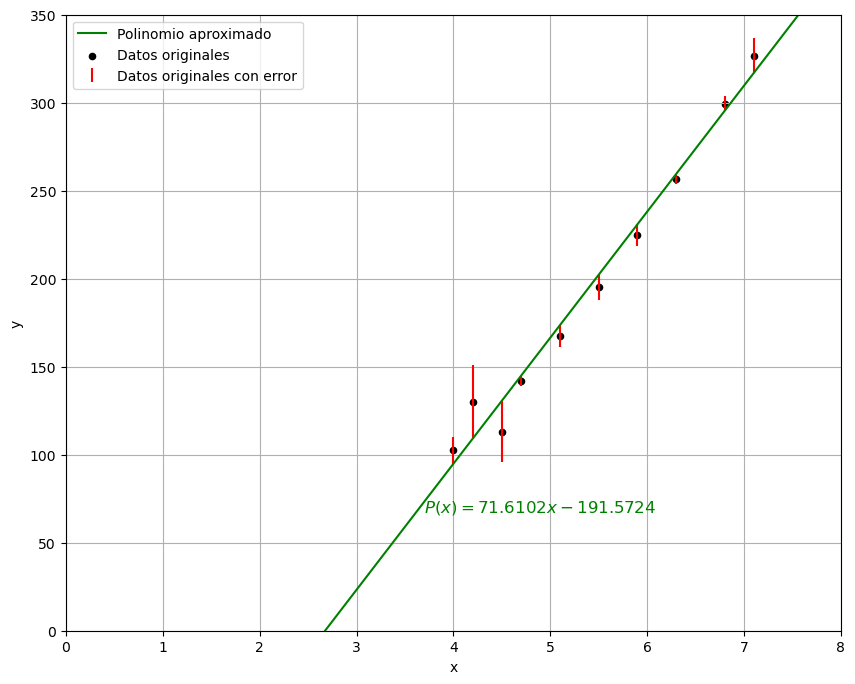

In [14]:
%autoreload 2

a,b = minimosCuadrados(len(xi_1),1,xi_1,yi_1)
c = hallarCoef(a,b)
graficar(xi_1,yi_1,c,'green',[0, 8],[0, 350],3.7,65,10)

**b)**

Matriz A:
 [       10.0000        54.1000       303.3900 ]
 [       54.1000       303.3900      1759.8310 ]
 [      303.3900      1759.8310     10523.1207 ]
Vector b:
 [     1958.3900 ]
 [    11361.7640 ]
 [    67962.4938 ]
Coeficientes del polinomio:
 [       51.0008 ]
 [      -19.3086 ]
 [        8.2171 ]
 
El error absoluto de f(x_1) al punto x_1 es de 2.68
El error absoluto de f(x_2) al punto x_2 es de 15.255676
El error absoluto de f(x_3) al punto x_3 es de 17.328375
El error absoluto de f(x_4) al punto x_4 es de 0.283881
El error absoluto de f(x_5) al punto x_5 es de 1.276289
El error absoluto de f(x_6) al punto x_6 es de 1.769225
El error absoluto de f(x_7) al punto x_7 es de 1.752689
El error absoluto de f(x_8) al punto x_8 es de 1.236681
El error absoluto de f(x_9) al punto x_9 es de 0.161024
El error absoluto de f(x_10) al punto x_10 es de 1.413751
El error cuadrático medio para este ajuste es de: 55.165621


El polinomio es:



<IPython.core.display.Math object>

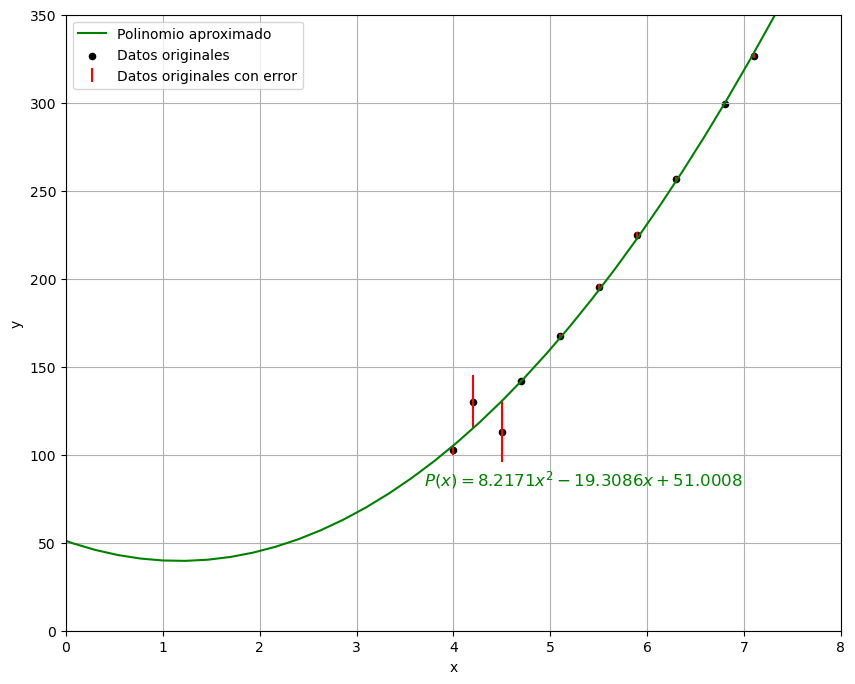

In [15]:
%autoreload 2

a,b = minimosCuadrados(len(xi_1),2,xi_1,yi_1)
c = hallarCoef(a,b)
graficar(xi_1,yi_1,c,'green',[0, 8],[0, 350],3.7,80,10)

**c)**

Matriz A:
 [       10.0000        54.1000       303.3900      1759.8310 ]
 [       54.1000       303.3900      1759.8310     10523.1207 ]
 [      303.3900      1759.8310     10523.1207     64607.9775 ]
 [     1759.8310     10523.1207     64607.9775    405616.7435 ]
Vector b:
 [     1958.3900 ]
 [    11361.7640 ]
 [    67962.4938 ]
 [   417441.6618 ]
Coeficientes del polinomio:
 [      469.1633 ]
 [     -254.8748 ]
 [       51.5610 ]
 [       -2.6068 ]
 
El error absoluto de f(x_1) al punto x_1 es de 5.2449
El error absoluto de f(x_2) al punto x_2 es de 15.017418
El error absoluto de f(x_3) al punto x_3 es de 15.6123
El error absoluto de f(x_4) al punto x_4 es de 2.461566
El error absoluto de f(x_5) al punto x_5 es de 2.921197
El error absoluto de f(x_6) al punto x_6 es de 1.7742
El error absoluto de f(x_7) al punto x_7 es de 0.011587
El error absoluto de f(x_8) al punto x_8 es de 1.35563
El error absoluto de f(x_9) al punto x_9 es de 1.033962
El error absoluto de f(x_10) al punto x_10 

<IPython.core.display.Math object>

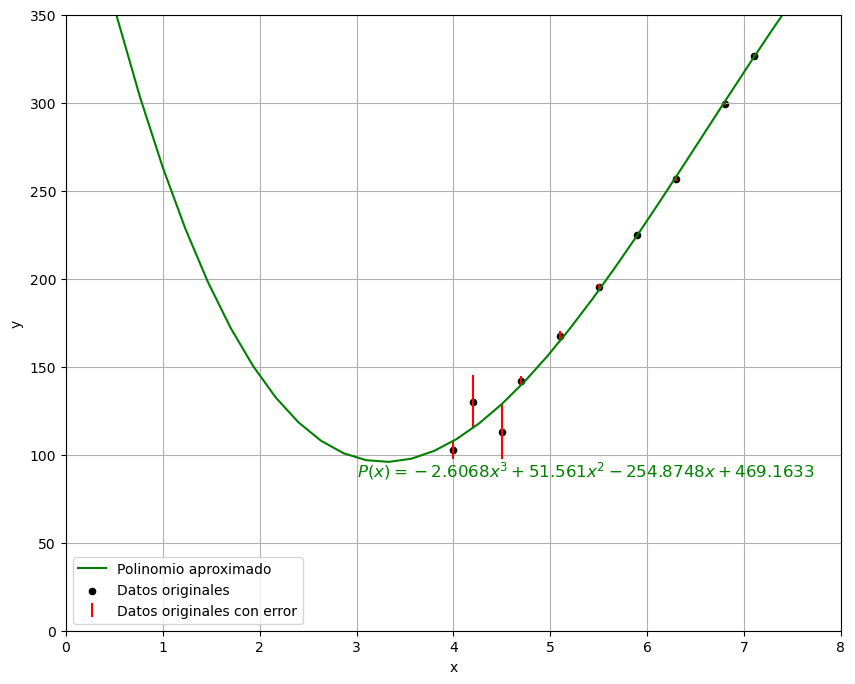

In [17]:
%autoreload 2

a,b = minimosCuadrados(len(xi_1),3,xi_1,yi_1)
c = hallarCoef(a,b)
graficar(xi_1,yi_1,c,'green',[0, 8],[0, 350],3,85,10)

**d)**

Matriz A:
 [       10.0000        54.1000 ]
 [       54.1000       303.3900 ]
Vector b:
 [       52.0336 ]
 [      285.4480 ]
Coeficientes del polinomio:
 [        3.2099 ]
 [        0.3685 ]
Con los coeficientes asociados al polinomio linealizado hallamos los coeficientes de nuestra
 expresión:

a = 0.368476623831711  y b = 24.776723697835532 

 
El error absoluto de f(x_1) al punto x_1 es de 5.631596
El error absoluto de f(x_2) al punto x_2 es de 13.643498
El error absoluto de f(x_3) al punto x_3 es de 16.900527
El error absoluto de f(x_4) al punto x_4 es de 2.020419
El error absoluto de f(x_5) al punto x_5 es de 5.261285
El error absoluto de f(x_6) al punto x_6 es de 7.10019
El error absoluto de f(x_7) al punto x_7 es de 6.966197
El error absoluto de f(x_8) al punto x_8 es de 4.219282
El error absoluto de f(x_9) al punto x_9 es de 4.097769
El error absoluto de f(x_10) al punto x_10 es de 12.365977
El error cuadrático medio para este ajuste es de: 82.17


El polinomio es:



<IPython.core.display.Math object>

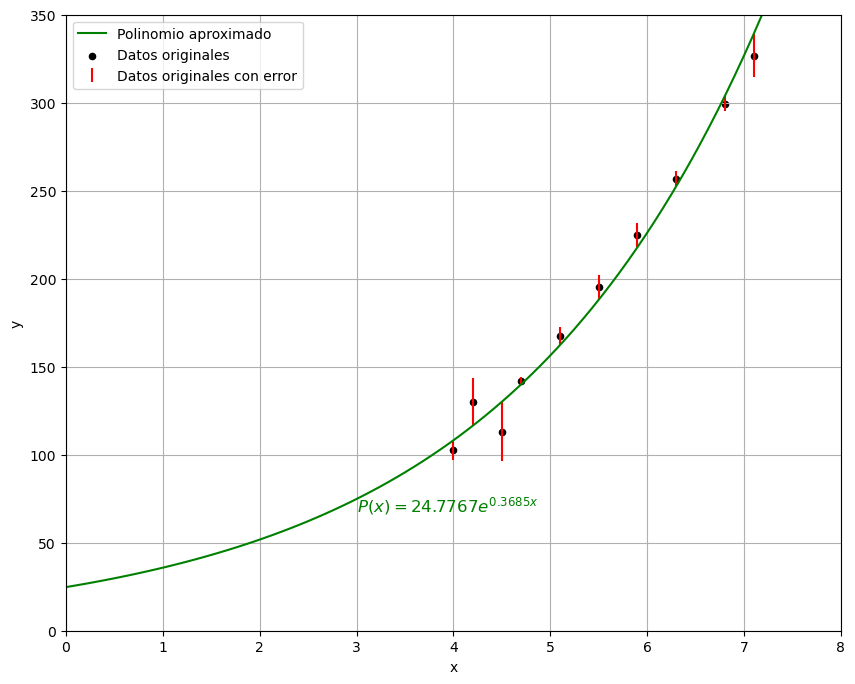

In [19]:
%autoreload 2

A,b = minimosCuadrados(len(xi_1),1,xi_1,yi_lin_1)
c = hallarCoef(A,b)
f_x = expOriginal(c,True)
graficarNoLineales(xi_1,yi_1,f_x,'green',[0,8],[0,350],3,65,5)

**e)**

Matriz A:
 [       10.0000        16.6995 ]
 [       16.6995        28.2537 ]
Vector b:
 [       52.0336 ]
 [       87.6238 ]
Coeficientes del polinomio:
 [        1.8747 ]
 [        1.9933 ]
Con los coeficientes asociados al polinomio linealizado hallamos los coeficientes de nuestra
 expresión:

a = 1.9932845789479074  y b = 6.518682345785391 

 
El error absoluto de f(x_1) al punto x_1 es de 0.774936
El error absoluto de f(x_2) al punto x_2 es de 16.220469
El error absoluto de f(x_3) al punto x_3 es de 17.500112
El error absoluto de f(x_4) al punto x_4 es de 0.462728
El error absoluto de f(x_5) al punto x_5 es de 0.180644
El error absoluto de f(x_6) al punto x_6 es de 0.188786
El error absoluto de f(x_7) al punto x_7 es de 0.636596
El error absoluto de f(x_8) al punto x_8 es de 1.173747
El error absoluto de f(x_9) al punto x_9 es de 1.92187
El error absoluto de f(x_10) al punto x_10 es de 2.399604
El error cuadrático medio para este ajuste es de: 58.15


El polinomio es:



<IPython.core.display.Math object>

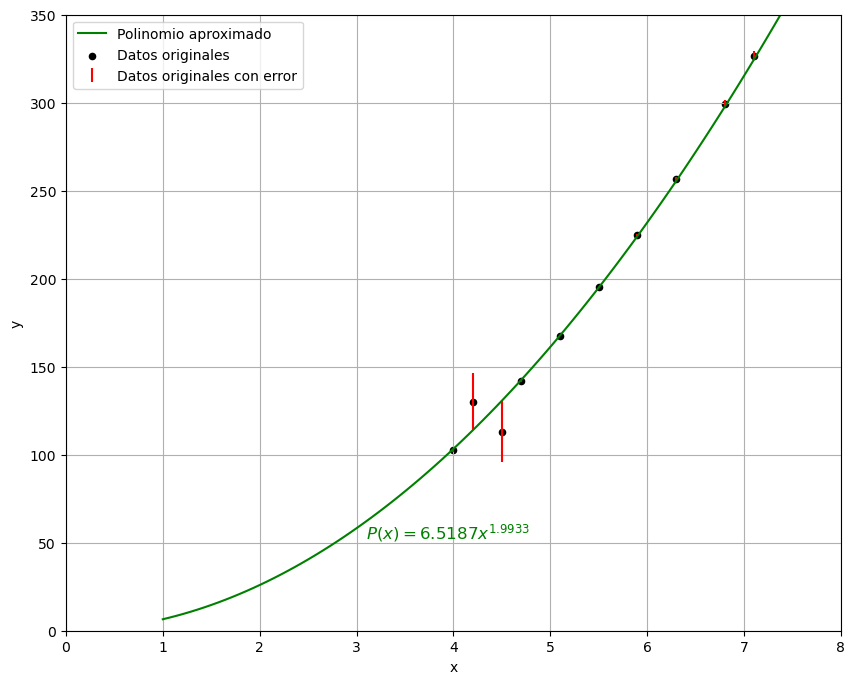

In [20]:
%autoreload 2

A,b = minimosCuadrados(len(xi_1),1,xi_lin_1,yi_lin_1)
c = hallarCoef(A,b)
f_x = expOriginal(c,False)
graficarNoLineales(xi_1,yi_1,f_x,'green',[0,8],[0,350],3.1,50,3)

---

2. Repita el ejercicio 5 para los siguientes datos. 


| $x_i$ | 0.2  | 0.3   | 0.6   | 0.9   | 1.1   | 1.3   | 1.4   | 1.6   |
|-----------|------|-------|-------|-------|-------|-------|-------|-------|
| $y_i$ | 0.050446 | 0.098426 | 0.33277 | 0.72660 | 1.0972 | 1.5697 | 1.8487 | 2.5015 |


In [22]:
xi_2 = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
yi_2 =[0.050446,0.098426,0.33277,0.72660,1.0972,1.5697,1.8487,2.5015]
xi_lin_2 = np.log(xi_2)
yi_lin_2 = np.log(yi_2)

**a) Construya el polinomio por mínimo cuadrados de grado 1 y calcule el error.**

Matriz A:
 [        8.0000         7.4000 ]
 [        7.4000         8.7200 ]
Vector b:
 [        8.2253 ]
 [       10.7313 ]
Coeficientes del polinomio:
 [       -0.5125 ]
 [        1.6655 ]
 
El error absoluto de f(x_1) al punto x_1 es de 0.229846
El error absoluto de f(x_2) al punto x_2 es de 0.111276
El error absoluto de f(x_3) al punto x_3 es de 0.15403
El error absoluto de f(x_4) al punto x_4 es de 0.25985
El error absoluto de f(x_5) al punto x_5 es de 0.22235
El error absoluto de f(x_6) al punto x_6 es de 0.08295
El error absoluto de f(x_7) al punto x_7 es de 0.0295
El error absoluto de f(x_8) al punto x_8 es de 0.3492
El error cuadrático medio para este ajuste es de: 0.041949


El polinomio es:



<IPython.core.display.Math object>

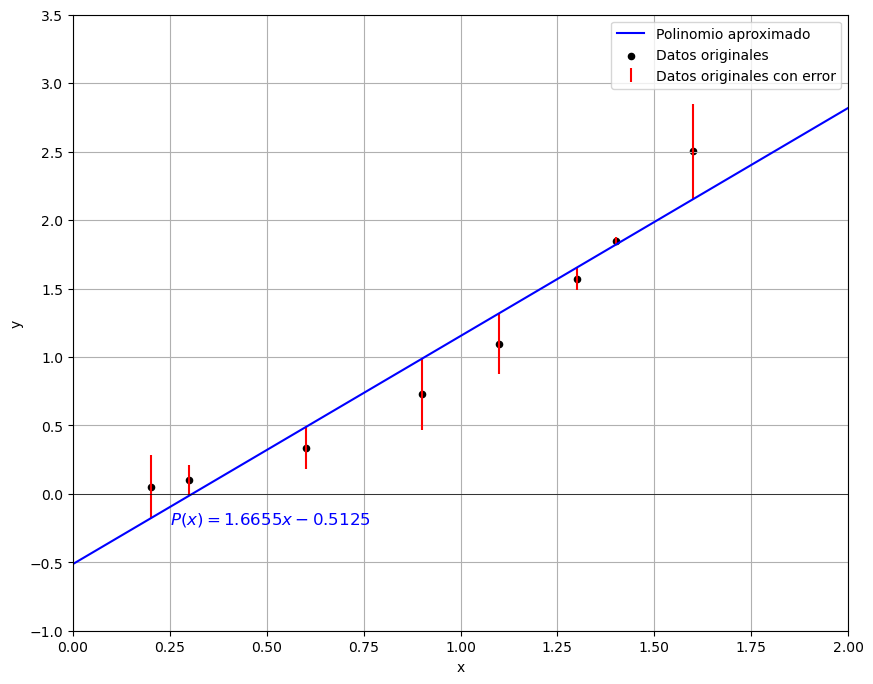

In [24]:
%autoreload 2

a,b = minimosCuadrados(len(xi_2),1,xi_2,yi_2)
c = hallarCoef(a,b)
graficar(xi_2,yi_2,c,'blue',[0, 2],[-1, 3.5],0.25,-0.25,10)

**b)Construya el polinomio por mínimo cuadrados de grado 2 y calcule el error.**

Matriz A:
 [        8.0000         7.4000         8.7200 ]
 [        7.4000         8.7200        11.3480 ]
 [        8.7200        11.3480        15.5108 ]
Vector b:
 [        8.2253 ]
 [       10.7313 ]
 [       14.7269 ]
Coeficientes del polinomio:
 [        0.0851 ]
 [       -0.3114 ]
 [        1.1294 ]
 
El error absoluto de f(x_1) al punto x_1 es de 0.01755
El error absoluto de f(x_2) al punto x_2 es de 0.0051
El error absoluto de f(x_3) al punto x_3 es de 0.027926
El error absoluto de f(x_4) al punto x_4 es de 0.006946
El error absoluto de f(x_5) al punto x_5 es de 0.011934
El error absoluto de f(x_6) al punto x_6 es de 0.019266
El error absoluto de f(x_7) al punto x_7 es de 0.014064
El error absoluto de f(x_8) al punto x_8 es de 0.023376
El error cuadrático medio para este ajuste es de: 0.000302


El polinomio es:



<IPython.core.display.Math object>

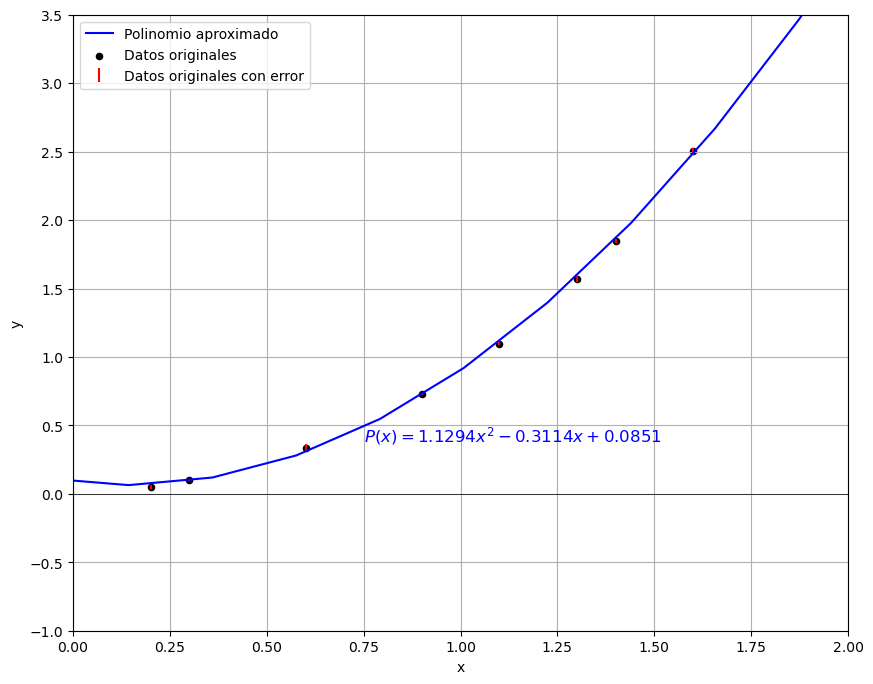

In [25]:
%autoreload 2

a,b = minimosCuadrados(len(xi_2),2,xi_2,yi_2)
c = hallarCoef(a,b)
graficar(xi_2,yi_2,c,'blue',[0, 2],[-1, 3.5],0.75,0.35,10)

**c)Construya el polinomio por mínimo cuadrados de grado 3 y calcule el error.**

Matriz A:
 [        8.0000         7.4000         8.7200        11.3480 ]
 [        7.4000         8.7200        11.3480        15.5108 ]
 [        8.7200        11.3480        15.5108        21.8584 ]
 [       11.3480        15.5108        21.8584        31.4840 ]
Vector b:
 [        8.2253 ]
 [       10.7313 ]
 [       14.7269 ]
 [       20.8326 ]
Coeficientes del polinomio:
 [       -0.0184 ]
 [        0.2484 ]
 [        0.4029 ]
 [        0.2662 ]
 
El error absoluto de f(x_1) al punto x_1 es de 0.00092
El error absoluto de f(x_2) al punto x_2 es de 0.001142
El error absoluto de f(x_3) al punto x_3 es de 0.000413
El error absoluto de f(x_4) al punto x_4 es de 0.001031
El error absoluto de f(x_5) al punto x_5 es de 0.000539
El error absoluto de f(x_6) al punto x_6 es de 0.000562
El error absoluto de f(x_7) al punto x_7 es de 0.000797
El error absoluto de f(x_8) al punto x_8 es de 0.000681
El error cuadrático medio para este ajuste es de: 1e-06


El polinomio es:



<IPython.core.display.Math object>

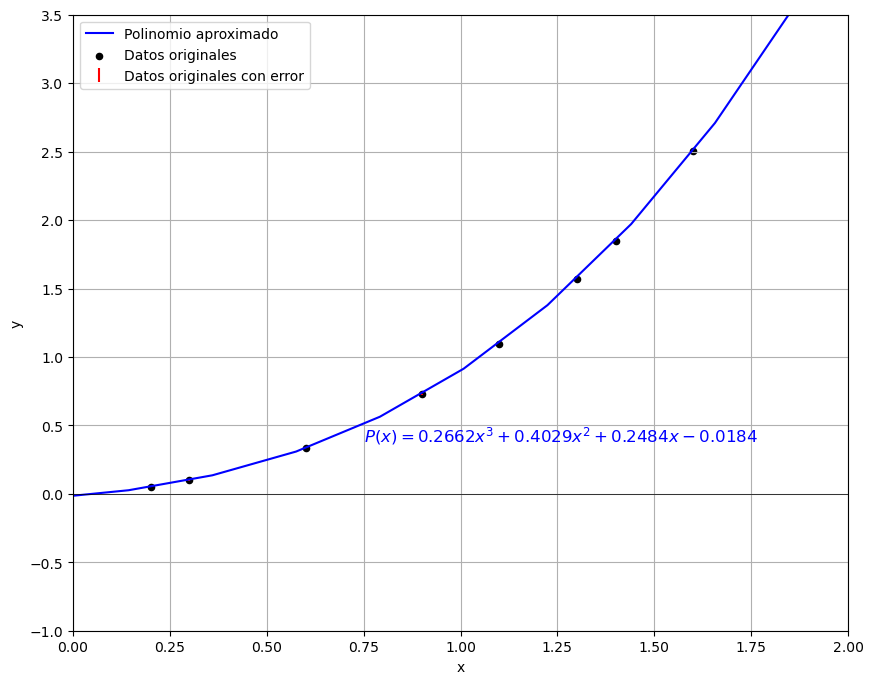

In [26]:
%autoreload 2

a,b = minimosCuadrados(len(xi_2),3,xi_2,yi_2)
c = hallarCoef(a,b)
graficar(xi_2,yi_2,c,'blue',[0, 2],[-1, 3.5],0.75,0.35,10)

**d)Construya el polinomio por mínimo cuadrados de la forma $be^{ax}$ y calcule el error.**

Matriz A:
 [        8.0000         7.4000 ]
 [        7.4000         8.7200 ]
Vector b:
 [       -4.6500 ]
 [        0.7750 ]
Coeficientes del polinomio:
 [       -3.0855 ]
 [        2.7073 ]
Con los coeficientes asociados al polinomio linealizado hallamos los coeficientes de nuestra
 expresión:

a = 2.707294686913418  y b = 0.04570748069533027 

 
El error absoluto de f(x_1) al punto x_1 es de 0.02809
El error absoluto de f(x_2) al punto x_2 es de 0.004529
El error absoluto de f(x_3) al punto x_3 es de 0.10083
El error absoluto de f(x_4) al punto x_4 es de 0.204077
El error absoluto de f(x_5) al punto x_5 es de 0.199238
El error absoluto de f(x_6) al punto x_6 es de 0.026539
El error absoluto de f(x_7) al punto x_7 es de 0.174262
El error absoluto de f(x_8) al punto x_8 es de 0.974989
El error cuadrático medio para este ajuste es de: 0.13


El polinomio es:



<IPython.core.display.Math object>

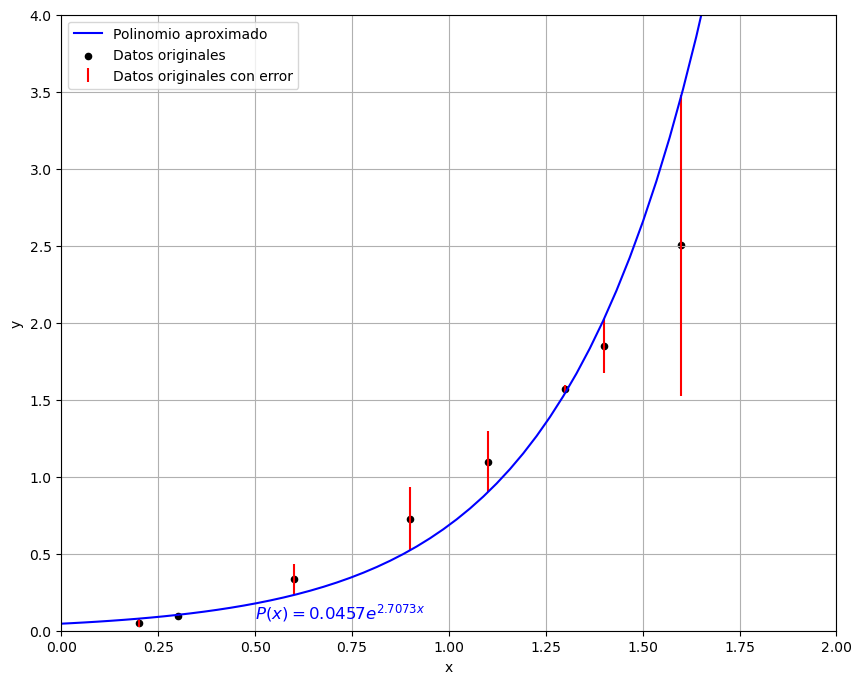

In [27]:
%autoreload 2
A,b = minimosCuadrados(len(xi_2),1,xi_2,yi_lin_2)
c = hallarCoef(A,b)
f_x = expOriginal(c,True)
graficarNoLineales(xi_2,yi_2,f_x,'blue',[0,2],[0,4],0.5,0.05,1)

**e)Construya el polinomio por mínimo cuadrados de la forma $bx^{a}$ y calcule el error.**

Matriz A:
 [        8.0000        -2.2654 ]
 [       -2.2654         4.7239 ]
Vector b:
 [       -4.6500 ]
 [        8.9591 ]
Coeficientes del polinomio:
 [       -0.0511 ]
 [        1.8720 ]
Con los coeficientes asociados al polinomio linealizado hallamos los coeficientes de nuestra
 expresión:

a = 1.8720092843265204  y b = 0.9501564755920617 

 
El error absoluto de f(x_1) al punto x_1 es de 0.003743
El error absoluto de f(x_2) al punto x_2 es de 0.001341
El error absoluto de f(x_3) al punto x_3 es de 0.032416
El error absoluto de f(x_4) al punto x_4 es de 0.053512
El error absoluto de f(x_5) al punto x_5 es de 0.038601
El error absoluto de f(x_6) al punto x_6 es de 0.016895
El error absoluto de f(x_7) al punto x_7 es de 0.064816
El error absoluto de f(x_8) al punto x_8 es de 0.211014
El error cuadrático medio para este ajuste es de: 0.01


El polinomio es:



<IPython.core.display.Math object>

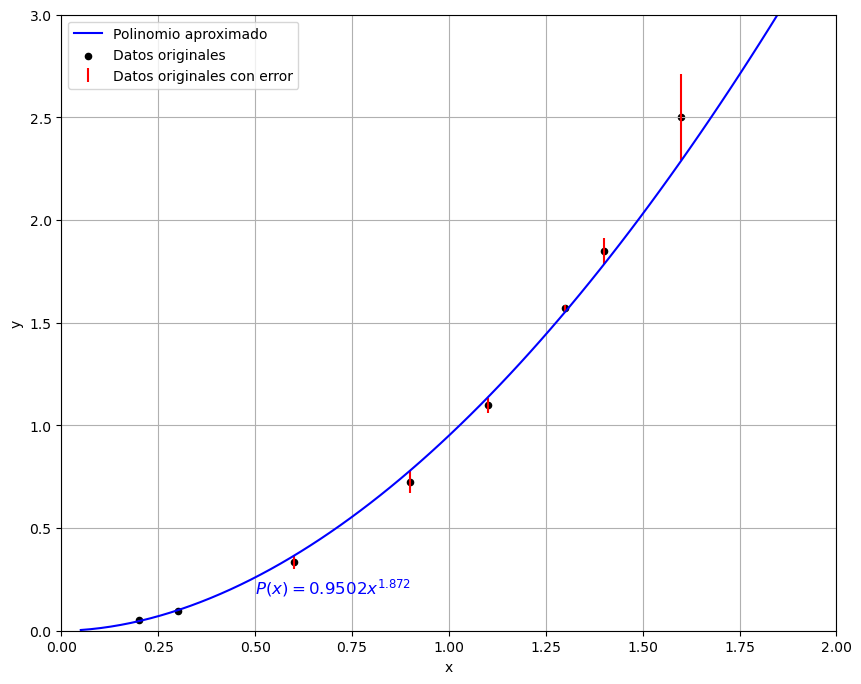

In [28]:
%autoreload 2

A,b = minimosCuadrados(len(xi_2),1,xi_lin_2,yi_lin_2)
c = hallarCoef(A,b)
f_x = expOriginal(c,False)
graficarNoLineales(xi_2,yi_2,f_x,'blue',[0,2],[0,3],0.5,0.16,0.15)

---

3. La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.

| Puntuación ACT | Promedio de puntos | Puntuación ACT | Promedio de puntos |
|----------------|--------------------|----------------|--------------------|
| 28             | 3.84               | 29             | 3.75               |
| 25             | 3.21               | 28             | 3.65               |
| 28             | 3.23               | 27             | 3.87               |
| 27             | 3.63               | 29             | 3.75               |
| 28             | 3.75               | 21             | 1.66               |
| 33             | 3.20               | 28             | 3.12               |
| 28             | 3.41               | 28             | 2.96               |
| 29             | 3.38               | 26             | 2.92               |
| 23             | 3.53               | 30             | 3.10               |
| 27             | 2.03               | 24             | 2.81               |


 
El error absoluto de f(x_1) al punto x_1 es de 0.5282
El error absoluto de f(x_2) al punto x_2 es de 0.2009
El error absoluto de f(x_3) al punto x_3 es de 0.0818
El error absoluto de f(x_4) al punto x_4 es de 0.4191
El error absoluto de f(x_5) al punto x_5 es de 0.4382
El error absoluto de f(x_6) al punto x_6 es de 0.6163
El error absoluto de f(x_7) al punto x_7 es de 0.0982
El error absoluto de f(x_8) al punto x_8 es de 0.0327
El error absoluto de f(x_9) al punto x_9 es de 0.7227
El error absoluto de f(x_10) al punto x_10 es de 1.1809
El error absoluto de f(x_11) al punto x_11 es de 0.3373
El error absoluto de f(x_12) al punto x_12 es de 0.3382
El error absoluto de f(x_13) al punto x_13 es de 0.6591
El error absoluto de f(x_14) al punto x_14 es de 0.3373
El error absoluto de f(x_15) al punto x_15 es de 0.9455
El error absoluto de f(x_16) al punto x_16 es de 0.1918
El error absoluto de f(x_17) al punto x_17 es de 0.3518
El error absoluto de f(x_18) al punto x_18 es de 0.19
El error a

<IPython.core.display.Math object>

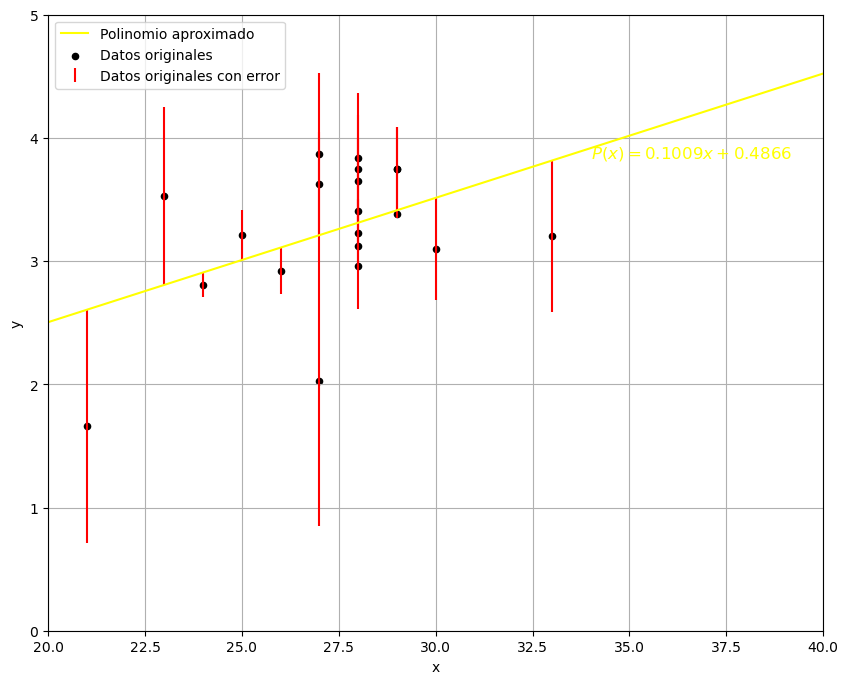

In [40]:
PACT = [28,25,28,27,28,33,28,29,23,27,29,28,27,29,21,28,28,26,30,24]
PDP = [3.84,3.21,3.23,3.63,3.75,3.20,3.41,3.38,3.53,2.03,3.75,3.65,
       3.87,3.75,1.66,3.12,2.96,2.92,3.10,2.81]

%autoreload 2

graficar(PACT,PDP,c,'yellow',[20,40],[0, 5],34,3.80,10)

---

4. El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las  características comparativas de supervivencia durante un choque de automóviles de diferentes clases. Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).

| Tipo                            | Peso promedio | Porcentaje de presentación |
|---------------------------------|---------------|----------------------------|
| 1. Regular lujoso doméstico     | 4800 lb       | 3.1                        |
| 2. Regular intermediario doméstico | 3700 lb    | 4.0                        |
| 3. Regular económico doméstico  | 3400 lb       | 5.2                        |
| 4. Compacto doméstico           | 2800 lb       | 6.4                        |
| 5. Compacto extranjero          | 1900 lb       | 9.6                        |


 
El error absoluto de f(x_1) al punto x_1 es de 0.9935
El error absoluto de f(x_2) al punto x_2 es de 0.6365
El error absoluto de f(x_3) al punto x_3 es de 0.1265
El error absoluto de f(x_4) al punto x_4 es de 0.3065
El error absoluto de f(x_5) al punto x_5 es de 0.8235
El error cuadrático medio para este ajuste es de: 0.436054


El polinomio es:



<IPython.core.display.Math object>

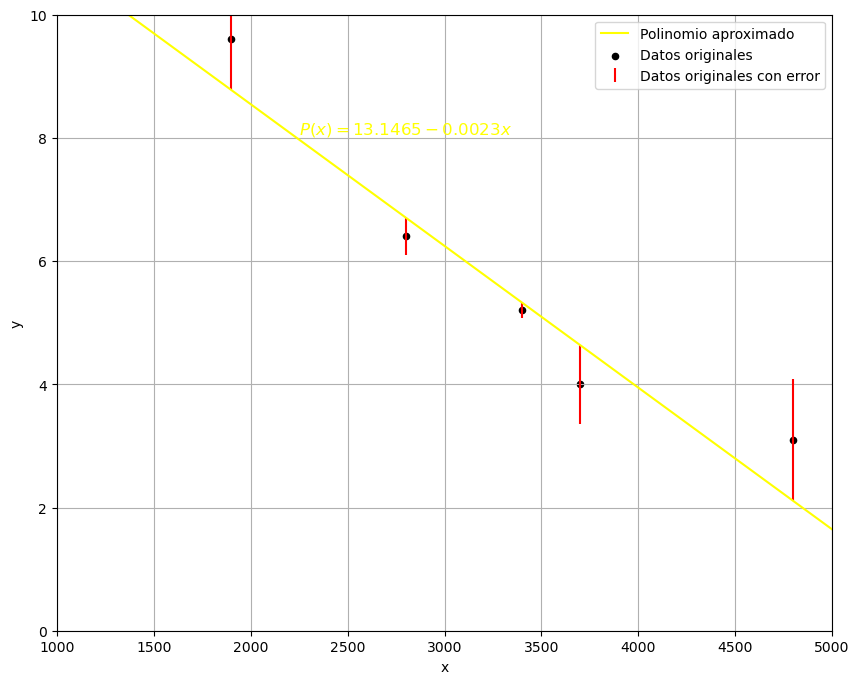

In [38]:
xi = [4800,3700,3400,2800,1900]
yi = [3.1,4.0,5.2,6.4,9.6]

%autoreload 2

graficar(xi,yi,c,'yellow',[1000, 5000],[0, 10],2250,8,1000)